In [4]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

PIL image size (224, 224)


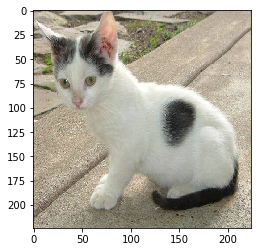

numpy array size: (224, 224, 3)
image batch size (1, 224, 224, 3)


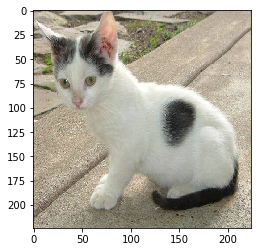

In [5]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename ='images/cat.jpg'
# load an image in PLT format
original =load_img(filename, target_size=(224, 224))
print('PIL image size', original.size)
plt.imshow(original)

plt.show()
# convert the PIL image to a numpy array
# IN PIL  -image is in(width, height, channel)
# in numpy -image is in (height, width, channel)
numpy_image =img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print('numpy array size:',numpy_image.shape)


# convert the image into batch format(batchsize, height, width, channel)
#we want the input matrix to the network to be of the form
#thus, we add the extra dimension to be axis 0
image_batch =np.expand_dims(numpy_image, axis =0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))


1. preprocess the input by subtracting the mean value from each channel of the images in the batch. why? because that has been done when traing the ImageNet, so use the preprocess_input() function and do it
2. get the classification result. done by model.predict() function
3. convert the result to human-readable labels

In [3]:
# the first demo using vgg16
processed_image= vgg16.preprocess_input(image_batch.copy())
predictions =vgg_model.predict(processed_image)
label =decode_predictions(predictions)
print(label)

40960/35363 [==================================] - 1s 25us/step
[[('n02123597', 'Siamese_cat', 0.21132146), ('n01877812', 'wallaby', 0.08228995), ('n02326432', 'hare', 0.07483198), ('n03223299', 'doormat', 0.055411488), ('n02124075', 'Egyptian_cat', 0.05300429)]]


In [10]:
# the second demo using inception_v3
processed_image2 = inception_v3.preprocess_input(image_batch.copy())
predictions2 =inception_model.predict(processed_image2)
label2 = decode_predictions(predictions2, top =3)
#print(label2)
label2

[[('n02124075', 'Egyptian_cat', 0.567858),
  ('n02123597', 'Siamese_cat', 0.11364223),
  ('n02123045', 'tabby', 0.03733632)]]

In [8]:
# the third demo using the ResNet50 model
# see the top 3 predictions using the top argument
processed_image =resnet50.preprocess_input(image_batch.copy())
predictions =resnet_model.predict(processed_image)
label_resnet =decode_predictions(predictions, top =3)
label_resnet

[[('n03223299', 'doormat', 0.16232204),
  ('n02123597', 'Siamese_cat', 0.1353529),
  ('n02124075', 'Egyptian_cat', 0.11903941)]]

- inception_v3 network
the input size for inception network is different from the other networks, it accepts inputs of size (299,299), thus we load the  image with target size according to that
 

In [9]:
#load an image in PIL format
original =load_img(filename, target_size =(299,299))
# convert the PIL image into numpy array
numpy_image =img_to_array(original)
# reshape data in terms of batchsize
image_batch =np.expand_dims(numpy_image, axis =0)
# prepare the image for the Inception model
processed_image =inception_v3.preprocess_input(image_batch.copy())
# get the predictions
predictions =inception_model.predict(processed_image)

label_inception =decode_predictions(predictions)
label_inception
# the differences between the size (299, 299) and (224,224) is little in the case 
#of this

[[('n02124075', 'Egyptian_cat', 0.567858),
  ('n02123597', 'Siamese_cat', 0.11364223),
  ('n02123045', 'tabby', 0.03733632),
  ('n03223299', 'doormat', 0.0194538),
  ('n04589890', 'window_screen', 0.017700298)]]

In [23]:
# cv Python-OpenCV 处理图像
import cv2
# np.unint8, a type
numpy_image =np.uint8(img_to_array(original)).copy()
numpy_image =cv2.resize(numpy_image, (900,900))
cv2.putText(numpy_image, "VGG: {},{:.2f}".format(label[0][0][1], label[0][0][2]),
           (350,40), cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),3)

cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) ,
            (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) ,
            (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

numpy_image =cv2.resize(numpy_image, (700,700))
cv2.imwrite("images/{}_output.jpg".format(filename.split('/')[-1].split('.')[0])
            ,cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

True

(-0.5, 699.5, 699.5, -0.5)

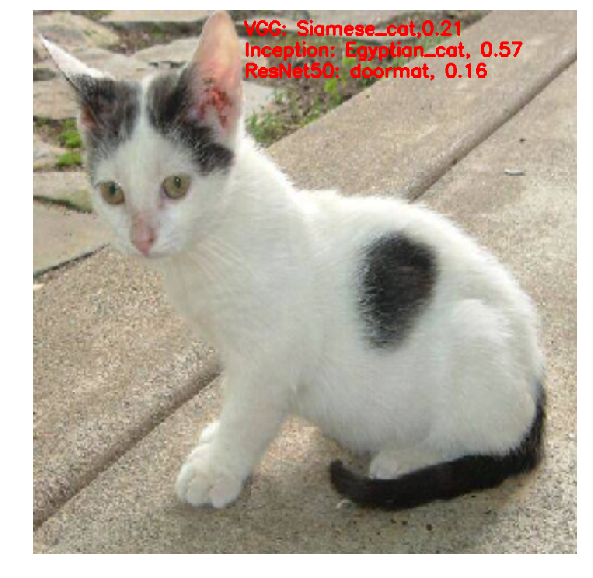

In [24]:
plt.figure(figsize=[10,10])
plt.imshow(numpy_image)
plt.axis('off')

In [19]:
print(filename)
print(filename.split('/'))
print(filename.split('/')[-1])
print(filename.split('/')[-1].split('.'))
print(filename.split('/')[-1].split('.')[0])

images/cat.jpg
['images', 'cat.jpg']
cat.jpg
['cat', 'jpg']
cat
